<a href="https://colab.research.google.com/github/NecipOz/Data_analysis/blob/main/Euro_2012_stats_TEAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import math

In [ ]:
df = pd.read_csv("Euro 2012 stats TEAM.csv")

### DATA CLEANING

In [ ]:
df.columns = df.columns.str.replace("-"," ").str.replace(" ","_").str.lower()

In [ ]:
df.head()

,team,goals,shots_on_target,shots_off_target,shooting_accuracy,%_goals_to_shots,total_shots_(inc._blocked),hit_woodwork,penalty_goals,penalties_not_scored,...,saves_made,saves_to_shots_ratio,fouls_won,fouls_conceded,offsides,yellow_cards,red_cards,subs_on,subs_off,players_used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team                        16 non-null     object 
 1   goals                       16 non-null     int64  
 2   shots_on_target             16 non-null     int64  
 3   shots_off_target            16 non-null     int64  
 4   shooting_accuracy           16 non-null     object 
 5   %_goals_to_shots            16 non-null     object 
 6   total_shots_(inc._blocked)  16 non-null     int64  
 7   hit_woodwork                16 non-null     int64  
 8   penalty_goals               16 non-null     int64  
 9   penalties_not_scored        16 non-null     int64  
 10  headed_goals                16 non-null     int64  
 11  passes                      16 non-null     int64  
 12  passes_completed            16 non-null     int64  
 13  passing_accuracy            16 non-nu

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goals,16.0,4.750000,2.886751,1.0,2.75,4.5,5.25,12.0
shots_on_target,16.0,17.125000,10.582218,7.0,9.75,13.0,22.00,42.0
shots_off_target,16.0,24.937500,10.680005,10.0,18.00,23.5,32.25,45.0
total_shots_(inc._blocked),16.0,54.937500,26.065223,27.0,36.50,44.0,68.75,110.0
hit_woodwork,16.0,1.250000,1.612452,0.0,0.00,1.0,2.00,6.0
penalty_goals,16.0,0.187500,0.403113,0.0,0.00,0.0,0.00,1.0
penalties_not_scored,16.0,0.062500,0.250000,0.0,0.00,0.0,0.00,1.0
headed_goals,16.0,1.375000,1.024695,0.0,0.75,1.5,2.00,3.0
passes,16.0,1763.375000,906.177898,851.0,1190.75,1522.0,1934.75,4317.0
passes_completed,16.0,1467.375000,827.580721,606.0,951.50,1211.5,1546.50,3820.0


In [ ]:
df.describe(include="O").T

,count,unique,top,freq
team,16,16,Croatia,1
shooting_accuracy,16,15,50.0%,2
%_goals_to_shots,16,14,16.0%,2
passing_accuracy,16,15,83.9%,2
saves_to_shots_ratio,16,15,66.7%,2


*Remove % character from the columns shooting_accuracy, %_goals_to_shots, passing_accuracy and saves_to_shots_ratio and convert type to float*

In [ ]:
df.shooting_accuracy.value_counts(dropna=False)

50.0%    2
51.9%    1
41.9%    1
37.9%    1
47.8%    1
30.7%    1
43.0%    1
25.0%    1
39.4%    1
34.3%    1
36.8%    1
22.5%    1
55.9%    1
47.2%    1
21.2%    1
Name: shooting_accuracy, dtype: int64

In [ ]:
df.shooting_accuracy = df.shooting_accuracy.str.replace("%","").astype("float")

In [ ]:
df.shooting_accuracy.value_counts(dropna=False)

50.0    2
51.9    1
41.9    1
37.9    1
47.8    1
30.7    1
43.0    1
25.0    1
39.4    1
34.3    1
36.8    1
22.5    1
55.9    1
47.2    1
21.2    1
Name: shooting_accuracy, dtype: int64

In [ ]:
df["%_goals_to_shots"].value_counts(dropna=False)

16.0%    2
5.2%     2
12.9%    1
20.0%    1
17.2%    1
6.5%     1
15.6%    1
19.2%    1
7.5%     1
4.1%     1
9.3%     1
12.5%    1
13.8%    1
6.0%     1
Name: %_goals_to_shots, dtype: int64

In [ ]:
df["%_goals_to_shots"] = df["%_goals_to_shots"].str.replace("%","").astype("float")

In [ ]:
df["passing_accuracy"].value_counts(dropna=False)

83.9%    2
76.9%    1
78.1%    1
83.3%    1
80.6%    1
87.2%    1
87.4%    1
76.7%    1
88.7%    1
80.4%    1
77.2%    1
71.2%    1
88.4%    1
80.9%    1
81.7%    1
Name: passing_accuracy, dtype: int64

In [ ]:
df["passing_accuracy"] = df["passing_accuracy"].str.replace("%","").astype("float")

In [ ]:
df["saves_to_shots_ratio"].value_counts(dropna=False)

66.7%    2
81.3%    1
60.1%    1
88.1%    1
54.6%    1
62.6%    1
65.1%    1
74.1%    1
70.6%    1
71.5%    1
65.4%    1
77.0%    1
93.8%    1
61.6%    1
76.5%    1
Name: saves_to_shots_ratio, dtype: int64

In [ ]:
df["saves_to_shots_ratio"] = df["saves_to_shots_ratio"].str.replace("%","").astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team                        16 non-null     object 
 1   goals                       16 non-null     int64  
 2   shots_on_target             16 non-null     int64  
 3   shots_off_target            16 non-null     int64  
 4   shooting_accuracy           16 non-null     float64
 5   %_goals_to_shots            16 non-null     float64
 6   total_shots_(inc._blocked)  16 non-null     int64  
 7   hit_woodwork                16 non-null     int64  
 8   penalty_goals               16 non-null     int64  
 9   penalties_not_scored        16 non-null     int64  
 10  headed_goals                16 non-null     int64  
 11  passes                      16 non-null     int64  
 12  passes_completed            16 non-null     int64  
 13  passing_accuracy            16 non-nu

In [ ]:
df.isnull().sum()

team                          0
goals                         0
shots_on_target               0
shots_off_target              0
shooting_accuracy             0
%_goals_to_shots              0
total_shots_(inc._blocked)    0
hit_woodwork                  0
penalty_goals                 0
penalties_not_scored          0
headed_goals                  0
passes                        0
passes_completed              0
passing_accuracy              0
touches                       0
crosses                       0
dribbles                      0
corners_taken                 0
tackles                       0
clearances                    0
interceptions                 0
clearances_off_line           1
clean_sheets                  0
blocks                        0
goals_conceded                0
saves_made                    0
saves_to_shots_ratio          0
fouls_won                     0
fouls_conceded                0
offsides                      0
yellow_cards                  0
red_card

## ANALYSIS

In [ ]:
def team_analysis(column):
  print()
  print()
  print("----------------------------------")
  print(column.upper(),"ANAYSIS")
  group_order = df[["team", column]].sort_values(column, ascending=False).team
  sns.barplot(x="team", y=column,data=df, order=group_order)
  plt.xticks(rotation=90)
  plt.show()
  print("----------------------------------")
  # Max
  print(f"Countries that have max {column}:")
  max_value = df[df[column] == max(df[column])].team.values
  for i in range(len(max_value)):
    print(max_value[i], max(df[column]), column)
  print("----------------------------------")
  # Min
  print(f"Countries that have min {column}:")
  min_value = df[df[column] == min(df[column])].team.values
  for i in range(len(min_value)):
    print(min_value[i], min(df[column]), column)
  print("----------------------------------")
  print(f"Average {column}: {df[column].mean()}")
  print("----------------------------------")
  print(df[["team", column]].sort_values(column, ascending=False))
  




----------------------------------
GOALS ANAYSIS


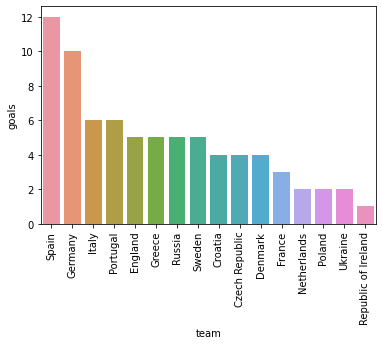

----------------------------------
Countries that have max goals:
Spain 12 goals
----------------------------------
Countries that have min goals:
Republic of Ireland 1 goals
----------------------------------
Average goals: 4.75
----------------------------------
                   team  goals
13                Spain     12
5               Germany     10
7                 Italy      6
10             Portugal      6
3               England      5
6                Greece      5
12               Russia      5
14               Sweden      5
0               Croatia      4
1        Czech Republic      4
2               Denmark      4
4                France      3
8           Netherlands      2
9                Poland      2
15              Ukraine      2
11  Republic of Ireland      1


----------------------------------
SHOTS_ON_TARGET ANAYSIS


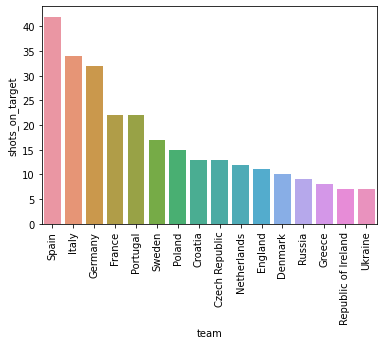

----------------------------------
Countries that have max shots_on_target:
Spain 42 shots_on_target
----------------------------------
Countries that have min shots_on_target:
Republic of Ireland 7 shots_on_target
Ukraine 7 shots_on_target
----------------------------------
Average shots_on_target: 17.125
----------------------------------
                   team  shots_on_target
13                Spain               42
7                 Italy               34
5               Germany               32
4                France               22
10             Portugal               22
14               Sweden               17
9                Poland               15
0               Croatia               13
1        Czech Republic               13
8           Netherlands               12
3               England               11
2               Denmark               10
12               Russia                9
6                Greece                8
11  Republic of Ireland                7
1

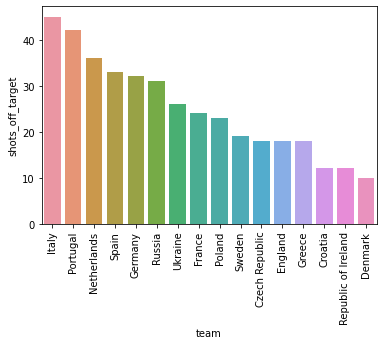

----------------------------------
Countries that have max shots_off_target:
Italy 45 shots_off_target
----------------------------------
Countries that have min shots_off_target:
Denmark 10 shots_off_target
----------------------------------
Average shots_off_target: 24.9375
----------------------------------
                   team  shots_off_target
7                 Italy                45
10             Portugal                42
8           Netherlands                36
13                Spain                33
5               Germany                32
12               Russia                31
15              Ukraine                26
4                France                24
9                Poland                23
14               Sweden                19
1        Czech Republic                18
3               England                18
6                Greece                18
0               Croatia                12
11  Republic of Ireland                12
2               

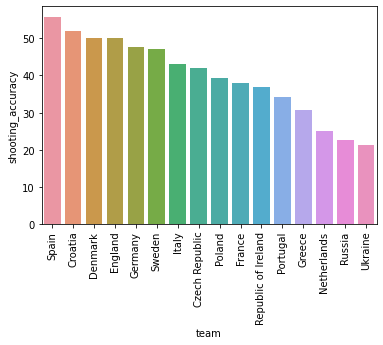

----------------------------------
Countries that have max shooting_accuracy:
Spain 55.9 shooting_accuracy
----------------------------------
Countries that have min shooting_accuracy:
Ukraine 21.2 shooting_accuracy
----------------------------------
Average shooting_accuracy: 39.71875000000001
----------------------------------
                   team  shooting_accuracy
13                Spain               55.9
0               Croatia               51.9
2               Denmark               50.0
3               England               50.0
5               Germany               47.8
14               Sweden               47.2
7                 Italy               43.0
1        Czech Republic               41.9
9                Poland               39.4
4                France               37.9
11  Republic of Ireland               36.8
10             Portugal               34.3
6                Greece               30.7
8           Netherlands               25.0
12               Russia 

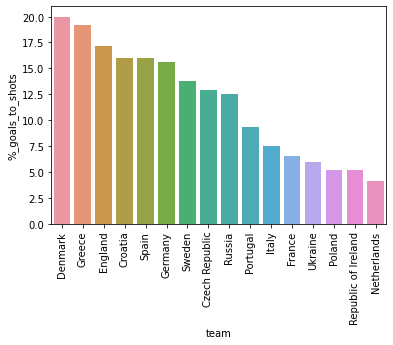

----------------------------------
Countries that have max %_goals_to_shots:
Denmark 20.0 %_goals_to_shots
----------------------------------
Countries that have min %_goals_to_shots:
Netherlands 4.1 %_goals_to_shots
----------------------------------
Average %_goals_to_shots: 11.6875
----------------------------------
                   team  %_goals_to_shots
2               Denmark              20.0
6                Greece              19.2
3               England              17.2
0               Croatia              16.0
13                Spain              16.0
5               Germany              15.6
14               Sweden              13.8
1        Czech Republic              12.9
12               Russia              12.5
10             Portugal               9.3
7                 Italy               7.5
4                France               6.5
15              Ukraine               6.0
9                Poland               5.2
11  Republic of Ireland               5.2
8      

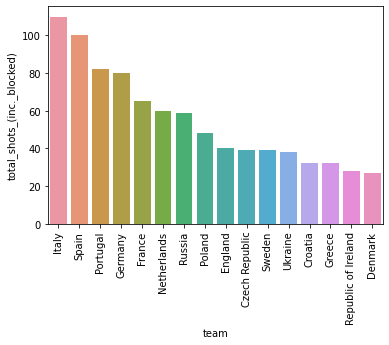

----------------------------------
Countries that have max total_shots_(inc._blocked):
Italy 110 total_shots_(inc._blocked)
----------------------------------
Countries that have min total_shots_(inc._blocked):
Denmark 27 total_shots_(inc._blocked)
----------------------------------
Average total_shots_(inc._blocked): 54.9375
----------------------------------
                   team  total_shots_(inc._blocked)
7                 Italy                         110
13                Spain                         100
10             Portugal                          82
5               Germany                          80
4                France                          65
8           Netherlands                          60
12               Russia                          59
9                Poland                          48
3               England                          40
1        Czech Republic                          39
14               Sweden                          39
15           

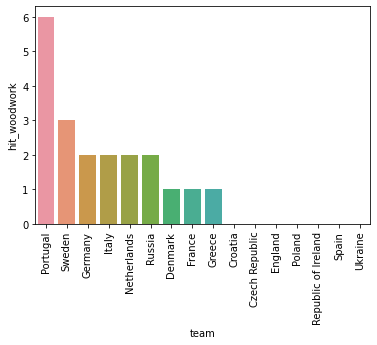

----------------------------------
Countries that have max hit_woodwork:
Portugal 6 hit_woodwork
----------------------------------
Countries that have min hit_woodwork:
Croatia 0 hit_woodwork
Czech Republic 0 hit_woodwork
England 0 hit_woodwork
Poland 0 hit_woodwork
Republic of Ireland 0 hit_woodwork
Spain 0 hit_woodwork
Ukraine 0 hit_woodwork
----------------------------------
Average hit_woodwork: 1.25
----------------------------------
                   team  hit_woodwork
10             Portugal             6
14               Sweden             3
5               Germany             2
7                 Italy             2
8           Netherlands             2
12               Russia             2
2               Denmark             1
4                France             1
6                Greece             1
0               Croatia             0
1        Czech Republic             0
3               England             0
9                Poland             0
11  Republic of Ireland 

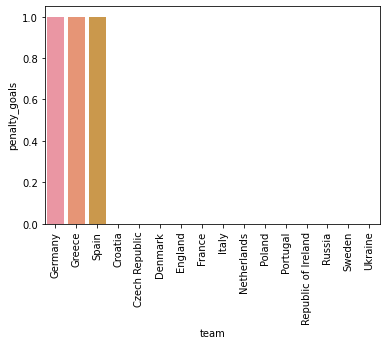

----------------------------------
Countries that have max penalty_goals:
Germany 1 penalty_goals
Greece 1 penalty_goals
Spain 1 penalty_goals
----------------------------------
Countries that have min penalty_goals:
Croatia 0 penalty_goals
Czech Republic 0 penalty_goals
Denmark 0 penalty_goals
England 0 penalty_goals
France 0 penalty_goals
Italy 0 penalty_goals
Netherlands 0 penalty_goals
Poland 0 penalty_goals
Portugal 0 penalty_goals
Republic of Ireland 0 penalty_goals
Russia 0 penalty_goals
Sweden 0 penalty_goals
Ukraine 0 penalty_goals
----------------------------------
Average penalty_goals: 0.1875
----------------------------------
                   team  penalty_goals
5               Germany              1
6                Greece              1
13                Spain              1
0               Croatia              0
1        Czech Republic              0
2               Denmark              0
3               England              0
4                France              0
7 

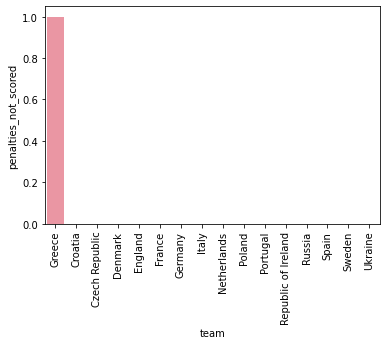

----------------------------------
Countries that have max penalties_not_scored:
Greece 1 penalties_not_scored
----------------------------------
Countries that have min penalties_not_scored:
Croatia 0 penalties_not_scored
Czech Republic 0 penalties_not_scored
Denmark 0 penalties_not_scored
England 0 penalties_not_scored
France 0 penalties_not_scored
Germany 0 penalties_not_scored
Italy 0 penalties_not_scored
Netherlands 0 penalties_not_scored
Poland 0 penalties_not_scored
Portugal 0 penalties_not_scored
Republic of Ireland 0 penalties_not_scored
Russia 0 penalties_not_scored
Spain 0 penalties_not_scored
Sweden 0 penalties_not_scored
Ukraine 0 penalties_not_scored
----------------------------------
Average penalties_not_scored: 0.0625
----------------------------------
                   team  penalties_not_scored
6                Greece                     1
0               Croatia                     0
1        Czech Republic                     0
2               Denmark             

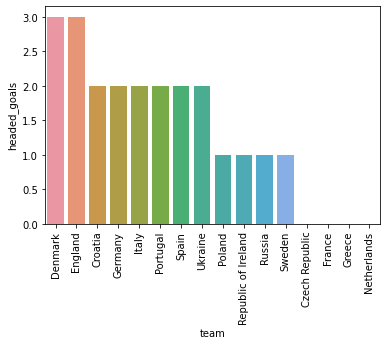

----------------------------------
Countries that have max headed_goals:
Denmark 3 headed_goals
England 3 headed_goals
----------------------------------
Countries that have min headed_goals:
Czech Republic 0 headed_goals
France 0 headed_goals
Greece 0 headed_goals
Netherlands 0 headed_goals
----------------------------------
Average headed_goals: 1.375
----------------------------------
                   team  headed_goals
2               Denmark             3
3               England             3
0               Croatia             2
5               Germany             2
7                 Italy             2
10             Portugal             2
13                Spain             2
15              Ukraine             2
9                Poland             1
11  Republic of Ireland             1
12               Russia             1
14               Sweden             1
1        Czech Republic             0
4                France             0
6                Greece             0
8

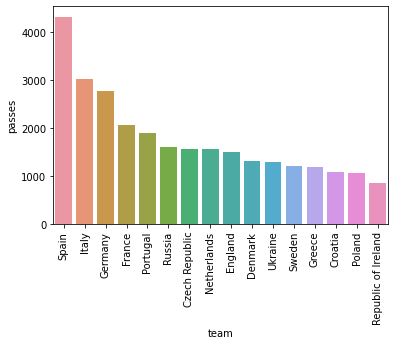

----------------------------------
Countries that have max passes:
Spain 4317 passes
----------------------------------
Countries that have min passes:
Republic of Ireland 851 passes
----------------------------------
Average passes: 1763.375
----------------------------------
                   team  passes
13                Spain    4317
7                 Italy    3016
5               Germany    2774
4                France    2066
10             Portugal    1891
12               Russia    1602
1        Czech Republic    1565
8           Netherlands    1556
3               England    1488
2               Denmark    1298
15              Ukraine    1276
14               Sweden    1192
6                Greece    1187
0               Croatia    1076
9                Poland    1059
11  Republic of Ireland     851


----------------------------------
PASSES_COMPLETED ANAYSIS


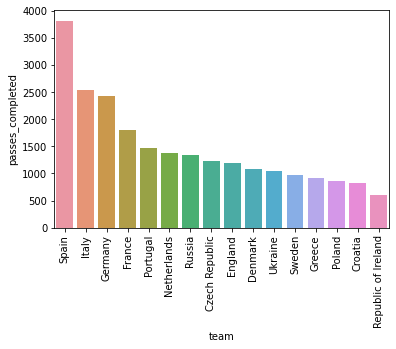

----------------------------------
Countries that have max passes_completed:
Spain 3820 passes_completed
----------------------------------
Countries that have min passes_completed:
Republic of Ireland 606 passes_completed
----------------------------------
Average passes_completed: 1467.375
----------------------------------
                   team  passes_completed
13                Spain              3820
7                 Italy              2531
5               Germany              2427
4                France              1803
10             Portugal              1461
8           Netherlands              1381
12               Russia              1345
1        Czech Republic              1223
3               England              1200
2               Denmark              1082
15              Ukraine              1043
14               Sweden               965
6                Greece               911
9                Poland               852
0               Croatia               828


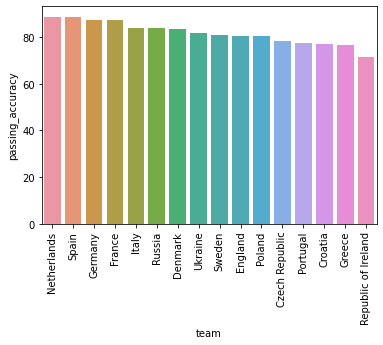

----------------------------------
Countries that have max passing_accuracy:
Netherlands 88.7 passing_accuracy
----------------------------------
Countries that have min passing_accuracy:
Republic of Ireland 71.2 passing_accuracy
----------------------------------
Average passing_accuracy: 81.65625000000003
----------------------------------
                   team  passing_accuracy
8           Netherlands              88.7
13                Spain              88.4
5               Germany              87.4
4                France              87.2
7                 Italy              83.9
12               Russia              83.9
2               Denmark              83.3
15              Ukraine              81.7
14               Sweden              80.9
3               England              80.6
9                Poland              80.4
1        Czech Republic              78.1
10             Portugal              77.2
0               Croatia              76.9
6                Greece   

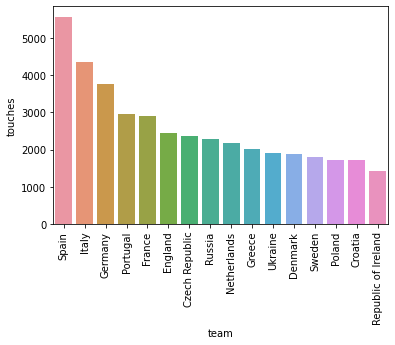

----------------------------------
Countries that have max touches:
Spain 5585 touches
----------------------------------
Countries that have min touches:
Republic of Ireland 1433 touches
----------------------------------
Average touches: 2579.1875
----------------------------------
                   team  touches
13                Spain     5585
7                 Italy     4363
5               Germany     3761
10             Portugal     2958
4                France     2909
3               England     2440
1        Czech Republic     2358
12               Russia     2278
8           Netherlands     2163
6                Greece     2016
15              Ukraine     1894
2               Denmark     1873
14               Sweden     1806
9                Poland     1724
0               Croatia     1706
11  Republic of Ireland     1433


----------------------------------
CROSSES ANAYSIS


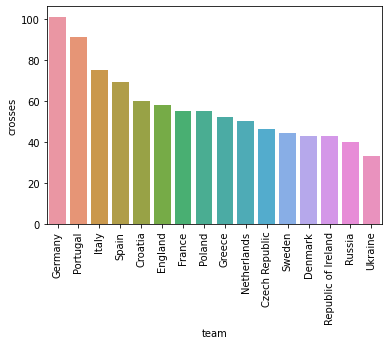

----------------------------------
Countries that have max crosses:
Germany 101 crosses
----------------------------------
Countries that have min crosses:
Ukraine 33 crosses
----------------------------------
Average crosses: 57.1875
----------------------------------
                   team  crosses
5               Germany      101
10             Portugal       91
7                 Italy       75
13                Spain       69
0               Croatia       60
3               England       58
4                France       55
9                Poland       55
6                Greece       52
8           Netherlands       50
1        Czech Republic       46
14               Sweden       44
2               Denmark       43
11  Republic of Ireland       43
12               Russia       40
15              Ukraine       33


----------------------------------
DRIBBLES ANAYSIS


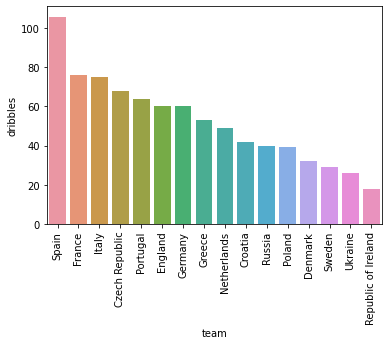

----------------------------------
Countries that have max dribbles:
Spain 106 dribbles
----------------------------------
Countries that have min dribbles:
Republic of Ireland 18 dribbles
----------------------------------
Average dribbles: 52.3125
----------------------------------
                   team  dribbles
13                Spain       106
4                France        76
7                 Italy        75
1        Czech Republic        68
10             Portugal        64
3               England        60
5               Germany        60
6                Greece        53
8           Netherlands        49
0               Croatia        42
12               Russia        40
9                Poland        39
2               Denmark        32
14               Sweden        29
15              Ukraine        26
11  Republic of Ireland        18


----------------------------------
CORNERS_TAKEN ANAYSIS


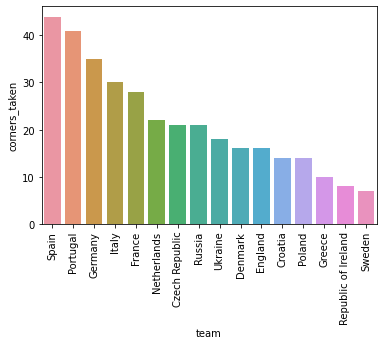

----------------------------------
Countries that have max corners_taken:
Spain 44 corners_taken
----------------------------------
Countries that have min corners_taken:
Sweden 7 corners_taken
----------------------------------
Average corners_taken: 21.5625
----------------------------------
                   team  corners_taken
13                Spain             44
10             Portugal             41
5               Germany             35
7                 Italy             30
4                France             28
8           Netherlands             22
1        Czech Republic             21
12               Russia             21
15              Ukraine             18
2               Denmark             16
3               England             16
0               Croatia             14
9                Poland             14
6                Greece             10
11  Republic of Ireland              8
14               Sweden              7


----------------------------------
TACKL

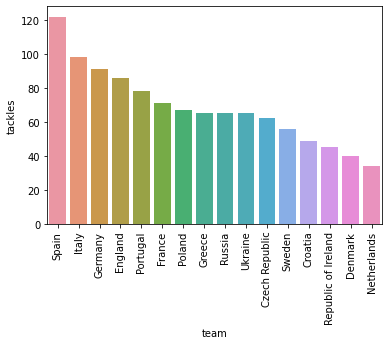

----------------------------------
Countries that have max tackles:
Spain 122 tackles
----------------------------------
Countries that have min tackles:
Netherlands 34 tackles
----------------------------------
Average tackles: 68.375
----------------------------------
                   team  tackles
13                Spain      122
7                 Italy       98
5               Germany       91
3               England       86
10             Portugal       78
4                France       71
9                Poland       67
6                Greece       65
12               Russia       65
15              Ukraine       65
1        Czech Republic       62
14               Sweden       56
0               Croatia       49
11  Republic of Ireland       45
2               Denmark       40
8           Netherlands       34


----------------------------------
CLEARANCES ANAYSIS


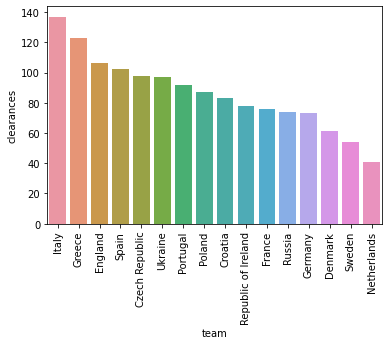

----------------------------------
Countries that have max clearances:
Italy 137 clearances
----------------------------------
Countries that have min clearances:
Netherlands 41 clearances
----------------------------------
Average clearances: 86.375
----------------------------------
                   team  clearances
7                 Italy         137
6                Greece         123
3               England         106
13                Spain         102
1        Czech Republic          98
15              Ukraine          97
10             Portugal          92
9                Poland          87
0               Croatia          83
11  Republic of Ireland          78
4                France          76
12               Russia          74
5               Germany          73
2               Denmark          61
14               Sweden          54
8           Netherlands          41


----------------------------------
INTERCEPTIONS ANAYSIS


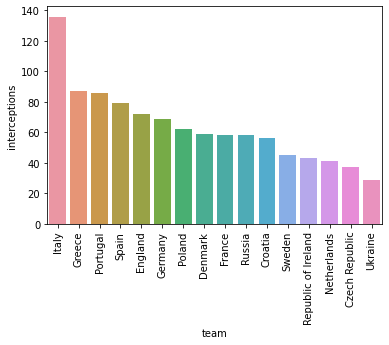

----------------------------------
Countries that have max interceptions:
Italy 136 interceptions
----------------------------------
Countries that have min interceptions:
Ukraine 29 interceptions
----------------------------------
Average interceptions: 63.5625
----------------------------------
                   team  interceptions
7                 Italy            136
6                Greece             87
10             Portugal             86
13                Spain             79
3               England             72
5               Germany             69
9                Poland             62
2               Denmark             59
4                France             58
12               Russia             58
0               Croatia             56
14               Sweden             45
11  Republic of Ireland             43
8           Netherlands             41
1        Czech Republic             37
15              Ukraine             29


----------------------------------
CL

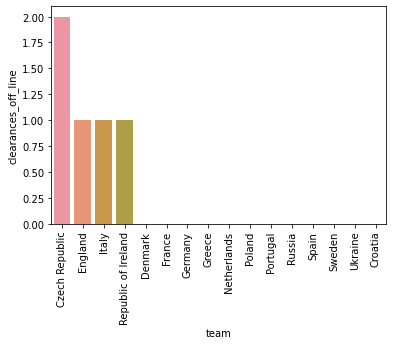

----------------------------------
Countries that have max clearances_off_line:
----------------------------------
Countries that have min clearances_off_line:
----------------------------------
Average clearances_off_line: 0.3333333333333333
----------------------------------
                   team  clearances_off_line
1        Czech Republic                  2.0
3               England                  1.0
7                 Italy                  1.0
11  Republic of Ireland                  1.0
2               Denmark                  0.0
4                France                  0.0
5               Germany                  0.0
6                Greece                  0.0
8           Netherlands                  0.0
9                Poland                  0.0
10             Portugal                  0.0
12               Russia                  0.0
13                Spain                  0.0
14               Sweden                  0.0
15              Ukraine                  0.0
0 

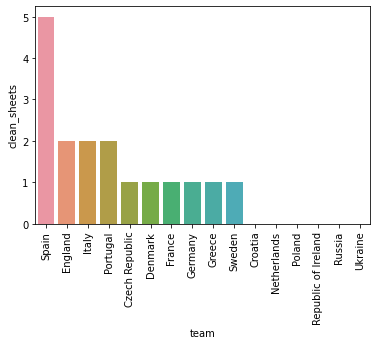

----------------------------------
Countries that have max clean_sheets:
Spain 5 clean_sheets
----------------------------------
Countries that have min clean_sheets:
Croatia 0 clean_sheets
Netherlands 0 clean_sheets
Poland 0 clean_sheets
Republic of Ireland 0 clean_sheets
Russia 0 clean_sheets
Ukraine 0 clean_sheets
----------------------------------
Average clean_sheets: 1.0625
----------------------------------
                   team  clean_sheets
13                Spain             5
3               England             2
7                 Italy             2
10             Portugal             2
1        Czech Republic             1
2               Denmark             1
4                France             1
5               Germany             1
6                Greece             1
14               Sweden             1
0               Croatia             0
8           Netherlands             0
9                Poland             0
11  Republic of Ireland             0
12          

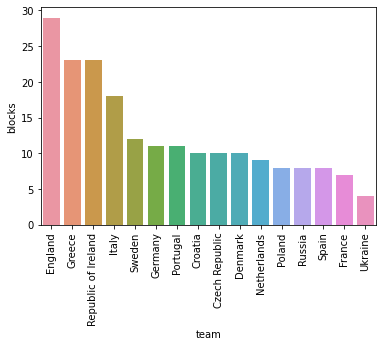

----------------------------------
Countries that have max blocks:
England 29 blocks
----------------------------------
Countries that have min blocks:
Ukraine 4 blocks
----------------------------------
Average blocks: 12.5625
----------------------------------
                   team  blocks
3               England      29
6                Greece      23
11  Republic of Ireland      23
7                 Italy      18
14               Sweden      12
5               Germany      11
10             Portugal      11
0               Croatia      10
1        Czech Republic      10
2               Denmark      10
8           Netherlands       9
9                Poland       8
12               Russia       8
13                Spain       8
4                France       7
15              Ukraine       4


----------------------------------
GOALS_CONCEDED ANAYSIS


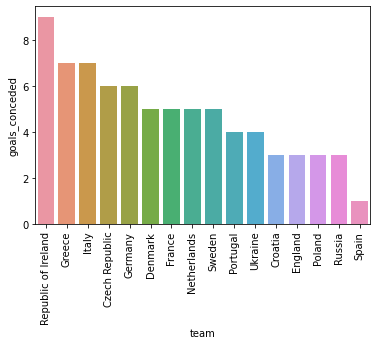

----------------------------------
Countries that have max goals_conceded:
Republic of Ireland 9 goals_conceded
----------------------------------
Countries that have min goals_conceded:
Spain 1 goals_conceded
----------------------------------
Average goals_conceded: 4.75
----------------------------------
                   team  goals_conceded
11  Republic of Ireland               9
6                Greece               7
7                 Italy               7
1        Czech Republic               6
5               Germany               6
2               Denmark               5
4                France               5
8           Netherlands               5
14               Sweden               5
10             Portugal               4
15              Ukraine               4
0               Croatia               3
3               England               3
9                Poland               3
12               Russia               3
13                Spain               1


---------

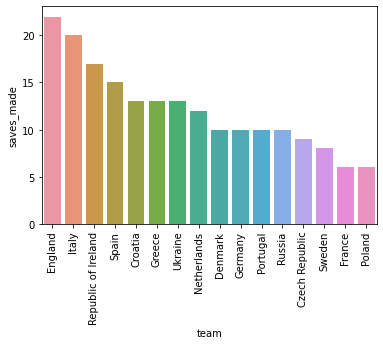

----------------------------------
Countries that have max saves_made:
England 22 saves_made
----------------------------------
Countries that have min saves_made:
France 6 saves_made
Poland 6 saves_made
----------------------------------
Average saves_made: 12.125
----------------------------------
                   team  saves_made
3               England          22
7                 Italy          20
11  Republic of Ireland          17
13                Spain          15
0               Croatia          13
6                Greece          13
15              Ukraine          13
8           Netherlands          12
2               Denmark          10
5               Germany          10
10             Portugal          10
12               Russia          10
1        Czech Republic           9
14               Sweden           8
4                France           6
9                Poland           6


----------------------------------
SAVES_TO_SHOTS_RATIO ANAYSIS


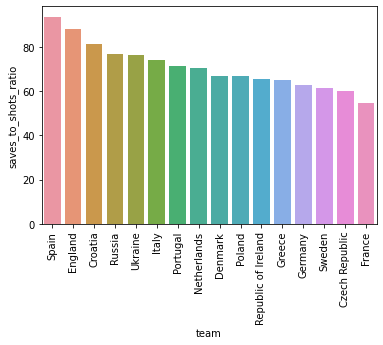

----------------------------------
Countries that have max saves_to_shots_ratio:
Spain 93.8 saves_to_shots_ratio
----------------------------------
Countries that have min saves_to_shots_ratio:
France 54.6 saves_to_shots_ratio
----------------------------------
Average saves_to_shots_ratio: 70.98125
----------------------------------
                   team  saves_to_shots_ratio
13                Spain                  93.8
3               England                  88.1
0               Croatia                  81.3
12               Russia                  77.0
15              Ukraine                  76.5
7                 Italy                  74.1
10             Portugal                  71.5
8           Netherlands                  70.6
2               Denmark                  66.7
9                Poland                  66.7
11  Republic of Ireland                  65.4
6                Greece                  65.1
5               Germany                  62.6
14               Swe

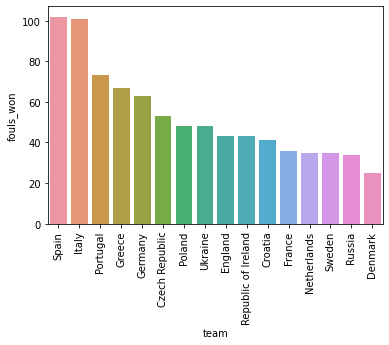

----------------------------------
Countries that have max fouls_won:
Spain 102 fouls_won
----------------------------------
Countries that have min fouls_won:
Denmark 25 fouls_won
----------------------------------
Average fouls_won: 52.9375
----------------------------------
                   team  fouls_won
13                Spain        102
7                 Italy        101
10             Portugal         73
6                Greece         67
5               Germany         63
1        Czech Republic         53
9                Poland         48
15              Ukraine         48
3               England         43
11  Republic of Ireland         43
0               Croatia         41
4                France         36
8           Netherlands         35
14               Sweden         35
12               Russia         34
2               Denmark         25


----------------------------------
FOULS_CONCEDED ANAYSIS


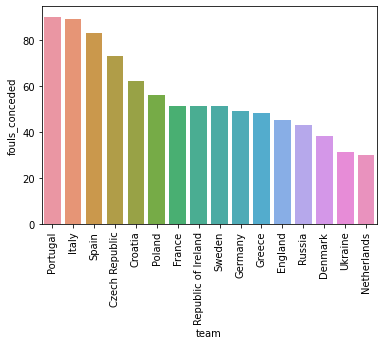

----------------------------------
Countries that have max fouls_conceded:
Portugal 90 fouls_conceded
----------------------------------
Countries that have min fouls_conceded:
Netherlands 30 fouls_conceded
----------------------------------
Average fouls_conceded: 55.625
----------------------------------
                   team  fouls_conceded
10             Portugal              90
7                 Italy              89
13                Spain              83
1        Czech Republic              73
0               Croatia              62
9                Poland              56
4                France              51
11  Republic of Ireland              51
14               Sweden              51
5               Germany              49
6                Greece              48
3               England              45
12               Russia              43
2               Denmark              38
15              Ukraine              31
8           Netherlands              30


----------

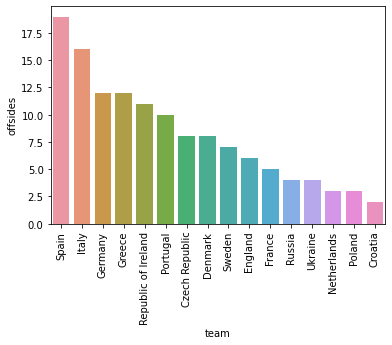

----------------------------------
Countries that have max offsides:
Spain 19 offsides
----------------------------------
Countries that have min offsides:
Croatia 2 offsides
----------------------------------
Average offsides: 8.125
----------------------------------
                   team  offsides
13                Spain        19
7                 Italy        16
5               Germany        12
6                Greece        12
11  Republic of Ireland        11
10             Portugal        10
1        Czech Republic         8
2               Denmark         8
14               Sweden         7
3               England         6
4                France         5
12               Russia         4
15              Ukraine         4
8           Netherlands         3
9                Poland         3
0               Croatia         2


----------------------------------
YELLOW_CARDS ANAYSIS


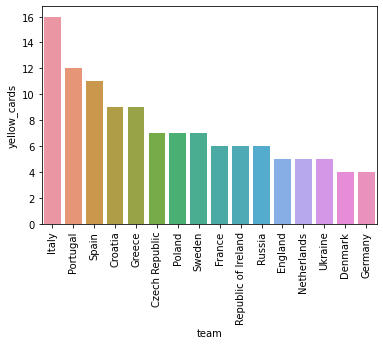

----------------------------------
Countries that have max yellow_cards:
Italy 16 yellow_cards
----------------------------------
Countries that have min yellow_cards:
Denmark 4 yellow_cards
Germany 4 yellow_cards
----------------------------------
Average yellow_cards: 7.4375
----------------------------------
                   team  yellow_cards
7                 Italy            16
10             Portugal            12
13                Spain            11
0               Croatia             9
6                Greece             9
1        Czech Republic             7
9                Poland             7
14               Sweden             7
4                France             6
11  Republic of Ireland             6
12               Russia             6
3               England             5
8           Netherlands             5
15              Ukraine             5
2               Denmark             4
5               Germany             4


----------------------------------
RED_

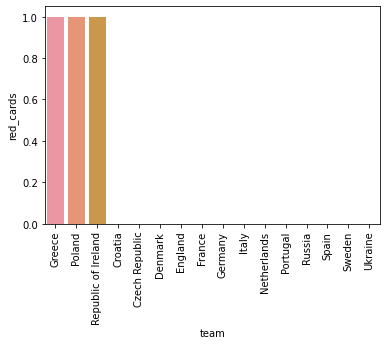

----------------------------------
Countries that have max red_cards:
Greece 1 red_cards
Poland 1 red_cards
Republic of Ireland 1 red_cards
----------------------------------
Countries that have min red_cards:
Croatia 0 red_cards
Czech Republic 0 red_cards
Denmark 0 red_cards
England 0 red_cards
France 0 red_cards
Germany 0 red_cards
Italy 0 red_cards
Netherlands 0 red_cards
Portugal 0 red_cards
Russia 0 red_cards
Spain 0 red_cards
Sweden 0 red_cards
Ukraine 0 red_cards
----------------------------------
Average red_cards: 0.1875
----------------------------------
                   team  red_cards
6                Greece          1
9                Poland          1
11  Republic of Ireland          1
0               Croatia          0
1        Czech Republic          0
2               Denmark          0
3               England          0
4                France          0
5               Germany          0
7                 Italy          0
8           Netherlands          0
10       

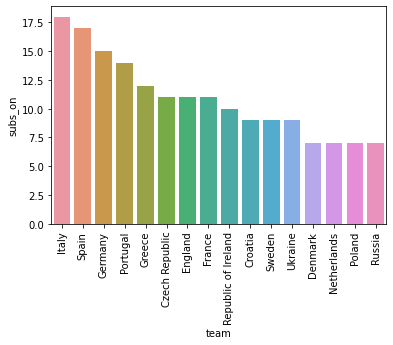

----------------------------------
Countries that have max subs_on:
Italy 18 subs_on
----------------------------------
Countries that have min subs_on:
Denmark 7 subs_on
Netherlands 7 subs_on
Poland 7 subs_on
Russia 7 subs_on
----------------------------------
Average subs_on: 10.875
----------------------------------
                   team  subs_on
7                 Italy       18
13                Spain       17
5               Germany       15
10             Portugal       14
6                Greece       12
1        Czech Republic       11
3               England       11
4                France       11
11  Republic of Ireland       10
0               Croatia        9
14               Sweden        9
15              Ukraine        9
2               Denmark        7
8           Netherlands        7
9                Poland        7
12               Russia        7


----------------------------------
SUBS_OFF ANAYSIS


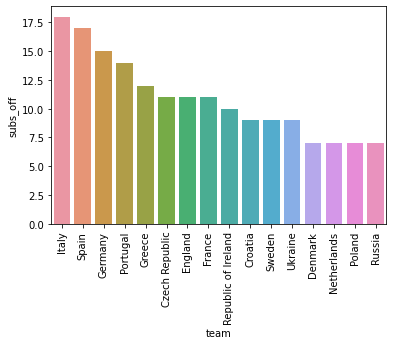

----------------------------------
Countries that have max subs_off:
Italy 18 subs_off
----------------------------------
Countries that have min subs_off:
Denmark 7 subs_off
Netherlands 7 subs_off
Poland 7 subs_off
Russia 7 subs_off
----------------------------------
Average subs_off: 10.875
----------------------------------
                   team  subs_off
7                 Italy        18
13                Spain        17
5               Germany        15
10             Portugal        14
6                Greece        12
1        Czech Republic        11
3               England        11
4                France        11
11  Republic of Ireland        10
0               Croatia         9
14               Sweden         9
15              Ukraine         9
2               Denmark         7
8           Netherlands         7
9                Poland         7
12               Russia         7


----------------------------------
PLAYERS_USED ANAYSIS


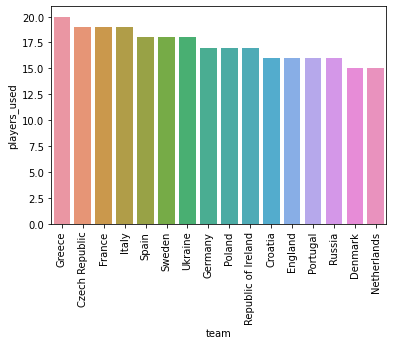

----------------------------------
Countries that have max players_used:
Greece 20 players_used
----------------------------------
Countries that have min players_used:
Denmark 15 players_used
Netherlands 15 players_used
----------------------------------
Average players_used: 17.25
----------------------------------
                   team  players_used
6                Greece            20
1        Czech Republic            19
4                France            19
7                 Italy            19
13                Spain            18
14               Sweden            18
15              Ukraine            18
5               Germany            17
9                Poland            17
11  Republic of Ireland            17
0               Croatia            16
3               England            16
10             Portugal            16
12               Russia            16
2               Denmark            15
8           Netherlands            15


In [ ]:
for i in df.columns[1:]:
  team_analysis(i)

### CORRELATION BETWEEN VARIABLES

In [ ]:
df.columns

Index(['team', 'goals', 'shots_on_target', 'shots_off_target',
       'shooting_accuracy', '%_goals_to_shots', 'total_shots_(inc._blocked)',
       'hit_woodwork', 'penalty_goals', 'penalties_not_scored', 'headed_goals',
       'passes', 'passes_completed', 'passing_accuracy', 'touches', 'crosses',
       'dribbles', 'corners_taken', 'tackles', 'clearances', 'interceptions',
       'clearances_off_line', 'clean_sheets', 'blocks', 'goals_conceded',
       'saves_made', 'saves_to_shots_ratio', 'fouls_won', 'fouls_conceded',
       'offsides', 'yellow_cards', 'red_cards', 'subs_on', 'subs_off',
       'players_used'],
      dtype='object')

In [ ]:
round(df[['goals', 'shots_on_target', 'shots_off_target','shooting_accuracy', 
    '%_goals_to_shots', 'total_shots_(inc._blocked)', 'passes', 
    'passes_completed', 'passing_accuracy']].corr(),2)

,goals,shots_on_target,shots_off_target,shooting_accuracy,%_goals_to_shots,total_shots_(inc._blocked),passes,passes_completed,passing_accuracy
goals,1.00,0.80,0.40,0.52,0.53,0.65,0.84,0.83,0.44
shots_on_target,0.80,1.00,0.61,0.50,0.05,0.89,0.93,0.92,0.54
shots_off_target,0.40,0.61,1.00,-0.27,-0.39,0.89,0.62,0.61,0.50
shooting_accuracy,0.52,0.50,-0.27,1.00,0.55,0.13,0.37,0.37,0.06
%_goals_to_shots,0.53,0.05,-0.39,0.55,1.00,-0.20,0.11,0.11,-0.02
total_shots_(inc._blocked),0.65,0.89,0.89,0.13,-0.20,1.00,0.88,0.86,0.57
passes,0.84,0.93,0.62,0.37,0.11,0.88,1.00,1.00,0.63
passes_completed,0.83,0.92,0.61,0.37,0.11,0.86,1.00,1.00,0.67
passing_accuracy,0.44,0.54,0.50,0.06,-0.02,0.57,0.63,0.67,1.00


There is a high correlation between the **'goals'** scored by the teams and **'shots_on_target', 'total_shots_(inc._blocked)', 'passes', 'passes_completed'** of the teams. There is a medium correlation between the **'goals'** scored by the teams and **'shots_off_target', 'shooting_accuracy', '%_goals_to_shots', 'passing_accuracy'** of the teams.

In [ ]:
df2 = df[['goals', 'shots_on_target', 'shots_off_target','shooting_accuracy', 
    '%_goals_to_shots', 'total_shots_(inc._blocked)', 'passes', 
    'passes_completed', 'passing_accuracy']]

In [ ]:
df2.corr()["goals"][1:]

shots_on_target               0.804193
shots_off_target              0.403821
shooting_accuracy             0.521210
%_goals_to_shots              0.533239
total_shots_(inc._blocked)    0.650109
passes                        0.838497
passes_completed              0.830062
passing_accuracy              0.438994
Name: goals, dtype: float64

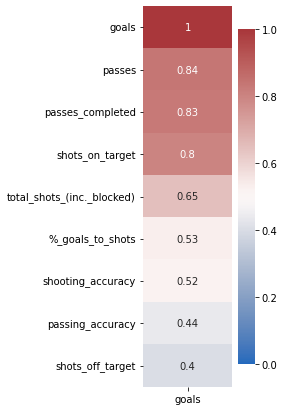

In [ ]:
plt.figure(figsize=(2, 7))
sns.heatmap(df2.corr()[["goals"]].sort_values(by='goals', ascending=False), 
            vmin=0, vmax=1, annot=True, cmap='vlag')